# 4.6 Lab: Logistic Regression, LDA, QDA, and KNN

## 4.6.1 The Stock Market Data

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
from patsy import dmatrices


import statsmodels.discrete.discrete_model as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix

In [165]:
Smarket = pd.read_csv('data/Smarket.csv', header=0)

In [166]:
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [167]:
list(Smarket)

['Year',
 'Lag1',
 'Lag2',
 'Lag3',
 'Lag4',
 'Lag5',
 'Volume',
 'Today',
 'Direction']

In [168]:
Smarket.shape

(1250, 9)

### For panda data frame, there is a method corr to compute pairwise correlation between numerical variables

In [169]:
Smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


### As one would expect, the correlations between the lag variables and today’s returns are close to zero. 

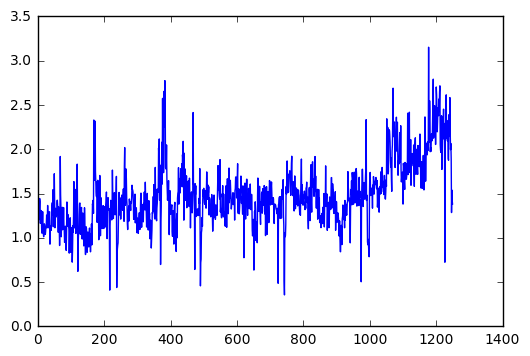

In [170]:
plt.plot(Smarket.ix[:, 6])
#plt.plot(Smarket[['Volume']])
plt.show()

## 4.6.2 Logistic Regression

## There is some known complications that in Sklearn about applying parameter regularization. This can be aviod to set the tuning parameter 'C' to a large number. Here to be consistent with R output, I decieded to use Statsmodels.

In [171]:
y, X = dmatrices('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket, return_type = 'dataframe')
print y

      Direction[Down]  Direction[Up]
0                 0.0            1.0
1                 0.0            1.0
2                 1.0            0.0
3                 0.0            1.0
4                 0.0            1.0
5                 0.0            1.0
6                 1.0            0.0
7                 0.0            1.0
8                 0.0            1.0
9                 0.0            1.0
10                1.0            0.0
11                1.0            0.0
12                0.0            1.0
13                0.0            1.0
14                1.0            0.0
15                0.0            1.0
16                1.0            0.0
17                0.0            1.0
18                1.0            0.0
19                1.0            0.0
20                1.0            0.0
21                1.0            0.0
22                0.0            1.0
23                1.0            0.0
24                1.0            0.0
25                0.0            1.0
2

### Since we are more interested in stock marketing up, we take the second column of y as our response

In [172]:
logit = sm.Logit(y.ix[:,1], X)
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Direction[Up]   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Mon, 27 Feb 2017   Pseudo R-squ.:                0.002074
Time:                        13:05:16   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601        -0.598     0.346
Lag1          -0.0731      0.050     -1.457      0.145        -0.171     0.025
Lag2          -0.0423      0.050     -0.845      0.398        -0.140     0.056
Lag3           0.0111      0.050      0.222      0.824        -0.087     0.109
Lag4           0.0094      0.050      0.187      0.851        -0.089     0.107
Lag5           0.0103      0.050      0.208      0.835        -0.087     0.107
Volume         0.1354      0.158      0.855      0.392        -0.175     0.446
==============================================================================
"""

### To extract the parameters directly

In [173]:
logit.fit().params

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

### To extract the probability of the market going up

In [174]:
logit.fit().predict()[0:11]

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


array([ 0.50708413,  0.48146788,  0.48113883,  0.51522236,  0.51078116,
        0.50695646,  0.49265087,  0.50922916,  0.51761353,  0.48883778,
        0.4965211 ])

### In order to make a prediction as to whether the market will go up or down on a particular day, we must convert these predicted probabilities into class labels, Up (1) or Down (0).

In [175]:
predict_label = pd.DataFrame(np.zeros(shape=(1250,1)), columns = ['label'])

In [176]:
predict_label.ix[logit.fit().predict()>0.5] = 1

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


### We can evalue the TRAINING result by constructing a confusion matrix 

In [177]:
confusion_matrix(y.ix[:,1], predict_label.ix[:,0])

array([[145, 457],
       [141, 507]])

### The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions. In this case, logistic regression correctly predicted the movement of the market 52.2% of the time.

In [178]:
np.mean(y.ix[:,1] == predict_label.ix[:,0]) # to get accuracy

0.52159999999999995

### In order to better assess the accuracy of the logistic regression model in this setting, we can fit the model using part of the data, and then examine how well it predicts the held out data. This will yield a more realistic error rate, in the sense that in practice we will be interested in our model’s performance not on the data that we used to fit the model, but rather on days in the future for which the market’s movements are unknown.

In [179]:
Smarket_2005 = Smarket.query('Year >= 2005')
Smarket_train = Smarket.query('Year < 2005')

### We will use the training dataset to build the logistic regression model 

In [180]:
y_train, X_train = dmatrices('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket_train, return_type = 'dataframe')
y_test, X_test = dmatrices('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket_2005, return_type = 'dataframe')

In [181]:
logit = sm.Logit(y_train.ix[:,1], X_train)
print logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Direction[Up]   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Mon, 27 Feb 2017   Pseudo R-squ.:                0.001562
Time:                        13:05:17   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
                                        LLR p-value:                    0.9044
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1912      0.334      0.573      0.567        -0.463     0.845
Lag1          -0.0542      0.

In [182]:
preds = logit.fit().predict(X_test)
predict_label = pd.DataFrame(np.zeros(shape=(X_test.shape[0],1)), columns = ['label'])
threshold = 0.5
predict_label.ix[preds >threshold] = 1
confusion_matrix(y_test.ix[:,1], predict_label.ix[:,0])

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


array([[77, 34],
       [97, 44]])

In [183]:
np.mean(y_test.ix[:,1]==predict_label.ix[:,0]) # to get accuracy

0.48015873015873017

### Notice that we have trained and tested our model on two completely separate data sets: training was performed using only the dates before 2005, and testing was performed using only the dates in 2005. Finally, we compute the predictions for 2005 and compare them to the actual movements of the market over that time period. The results are rather disappointing: the test error rate is 1 - 48% = 52 %, which is worse than random guessing! Of course this result is not all that surprising, given that one would not generally expect to be able to use previous days’ returns to predict future market performance.

### The retrain of the model with Lag1 and Lag2 will be similar to previous steps (I will omit those). Another way to deal with logistics regression is to change the threshold value from 0.5 to others. There is an example below with threshold 0.45. 

In [184]:
preds = logit.fit().predict(X_test)
predict_label = pd.DataFrame(np.zeros(shape=(X_test.shape[0],1)), columns = ['label'])
threshold = 0.45
predict_label.ix[preds >threshold] = 1
confusion_matrix(y_test.ix[:,1], predict_label.ix[:,0])
np.mean(y_test.ix[:,1]==predict_label.ix[:,0]) # to get accuracy

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


0.56746031746031744

In [185]:
y_train, X_train = dmatrices('Direction~Lag1+Lag2', Smarket_train, return_type = 'dataframe')
y_test, X_test = dmatrices('Direction~Lag1+Lag2', Smarket_2005, return_type = 'dataframe')
logit = sm.Logit(y_train.ix[:,1], X_train)
preds = logit.fit().predict(X_test)
predict_label = pd.DataFrame(np.zeros(shape=(X_test.shape[0],1)), columns = ['label'])
threshold = 0.5
predict_label.ix[preds >threshold] = 1
np.mean(y_test.ix[:,1]==predict_label.ix[:,0]) # to get accuracy

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


0.55952380952380953

## 4.6.3 Linear Discriminant Analysis

### We will use sklearn's implementation of LDA

In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### The training process 

In [187]:
sklearn_lda = LDA(n_components=2) #creating a LDA object
lda = sklearn_lda.fit(X_train.ix[:,1:3], y_train.ix[:,1]) #learning the projection matrix
X_lda = lda.transform(X_train.ix[:,1:3]) #using the model to project X 
X_labels = lda.predict(X_train.ix[:,1:3]) #gives you the predicted label for each sample
X_prob = lda.predict_proba(X_train.ix[:,1:3]) #the probability of each sample to belong to each class

### Testing step 

In [188]:
X_test_labels=lda.predict(X_test.ix[:,1:3])
X_test_prob = lda.predict_proba(X_test.ix[:,1:3]) 

### Get the accuracy of the test set 

In [189]:
np.mean(y_test.ix[:,1]==X_test_labels) 

0.55952380952380953

### Let's change the threshod a bit to see whether we can improve the accuracy. The 2nd column of X_test_prob is the probability belongs to UP group. The default value is 0.5, let us first check that. 

In [190]:
threshold = 0.5 
np.mean(y_test.ix[:,1]==(X_test_prob[:,1]>=threshold))

0.55952380952380953

In [191]:
threshold = 0.48
np.mean(y_test.ix[:,1]==(X_test_prob[:,1]>=threshold))

0.56349206349206349

## 4.6.4 Quadratic Discriminant Analysis

### It is a little bit of annoying that QDA and LDA have minor difference in their parameter set-up and function names. 

In [192]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [193]:
sklearn_qda = QDA(priors=None,store_covariances=True) #creating a QDA object
qda = sklearn_qda.fit(X_train.ix[:,1:3], y_train.ix[:,1]) #learning the projection matrix
X_labels = qda.predict(X_train.ix[:,1:3]) #gives you the predicted label for each sample
X_prob = qda.predict_proba(X_train.ix[:,1:3]) #the probability of each sample to belong to each class

X_test_labels=qda.predict(X_test.ix[:,1:3])
X_test_prob = qda.predict_proba(X_test.ix[:,1:3]) 

print np.mean(y_test.ix[:,1]==X_test_labels) 

0.599206349206


### Again, use dir() to explore all the information stored in lda and qda.

In [194]:
dir(qda)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 'classes_',
 'covariances_',
 'decision_function',
 'fit',
 'get_params',
 'means_',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'priors',
 'priors_',
 'reg_param',
 'rotations_',
 'scalings_',
 'score',
 'set_params',
 'store_covariances',
 'tol']

In [195]:
print qda.means_
print qda.covariances_

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
[array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]]), array([[ 1.51700576, -0.02787349],
       [-0.02787349,  1.49026815]])]


### 4.6.5 K-Nearest Neighbors

In [196]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [197]:
neigh = KNN(n_neighbors= 3) # use n_neighbors to change the # of tune the performance of KNN
KNN_fit = neigh.fit(X_train.ix[:,1:3], y_train.ix[:,1]) #learning the projection matrix
X_test_labels=KNN_fit.predict(X_test.ix[:,1:3])
X_test_prob = KNN_fit.predict_proba(X_test.ix[:,1:3]) 

print np.mean(y_test.ix[:,1]==X_test_labels) 

dir(neigh) # use dir command to check what KNN offers

0.531746031746


['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_init_params',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'classes_',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'outputs_2d_',
 'p',
 'predict',
 'predict_proba',
 'radius',
 'score',
 'set_params',
 'weights']

## 4.6.6 An Application to Caravan Insurance Data

In [198]:
Caravan = pd.read_csv('data/Caravan.csv', header=0)

In [199]:
Caravan.shape

(5822, 86)

In [200]:
Caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [201]:
Caravan.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


### Scale of the variables matters in KNN ! The core question in KNN is how to define proper distance metric. 

### Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale. For instance, imagine a data set that contains two variables, salary and age (measured in dollars and years, respectively). As far as KNN is concerned, a difference of 1,000 in salary is enormous compared to a difference of 50 years in age. Consequently, salary will drive the KNN classification results, and age will have almost no effect. This is contrary to our intuition that a salary difference of 1, 000 is quite small compared to an age difference of 50 years. Furthermore, the importance of scale to the KNN classifier leads to another issue: if we measured salary in Japanese yen, or if we measured age in minutes, then we’d get quite different classification results from what we get if these two variables are measured in dollars and years. 

### A good way (?) to handle this problem is to standardize the data so that all standardize variables are given a mean of zero and a standard deviation of one. Then all variables will be on a comparable scale. The scale() function does just scale() this. In standardizing the data, we exclude column 86, because that is the qualitative Purchase variable.

In [207]:
predict_label = pd.DataFrame(np.zeros(shape=(Caravan.shape[0],1)), columns = ['label'])
predict_label.ix[Caravan['Purchase'] == 'Yes'] = 1
Caravan_drop = Caravan.drop(labels='Purchase', axis=1)

### I took a slightly different approach from the book. The training and testing data were splited by index. The normalization was done on the train set. Afterwards, the same normalization was applied to validate test.  The code might seem wordy, but it helps clear the logical flow. 

In [212]:
from sklearn import preprocessing
train_size = 1000
train_index = xrange(0, train_size)
X_validate = Caravan_drop.ix[train_index, ]
Y_validate = predict_label.ix[train_index, ]
X_train = Caravan_drop.ix[train_size:, ]
Y_train = predict_label.ix[train_size:, ]


X_train_scaled = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_validate_scaled = scaler.transform(X_validate)   

### Train with 1 neighbor 

In [215]:
neigh = KNN(n_neighbors= 1) # use n_neighbors to change the # of tune the performance of KNN
KNN_fit = neigh.fit(X_train_scaled, Y_train.ix[:,0]) #learning the projection matrix
X_validate_labels=KNN_fit.predict(X_validate_scaled)
X_validate_prob = KNN_fit.predict_proba(X_validate_scaled) 

print np.mean(Y_validate.ix[:,0]==X_validate_labels) 
print confusion_matrix(Y_validate.ix[:,0], X_validate_labels)

0.883
[[874  67]
 [ 50   9]]


### The rest of this exercise considers all the trade-off between False postive and False negative.  The concept of accuracy is NOT always the golden metric for classification problems. 
### Precision and recall, sensitivity and specificity, F1 score... are all reasonable metrics to consider. 